Definir las visualizaciones del paso anterior como funciones y aplicarlas al dataframe.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import string
import matplotlib.dates as mdates

In [2]:
def visualizar_nulos(df):
    sns.heatmap(df.isnull(), cbar=False)
    plt.show()

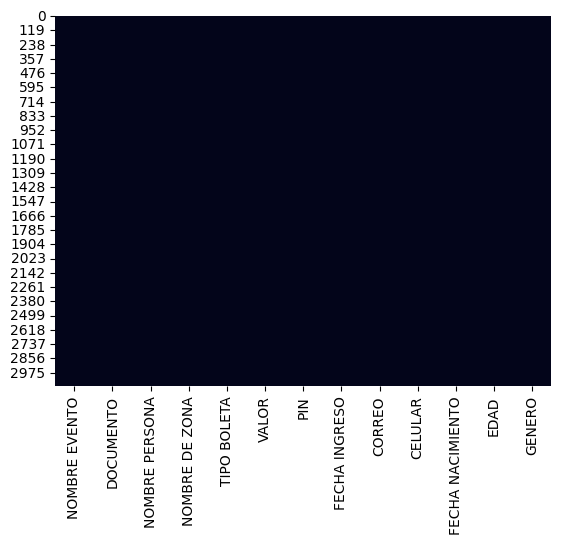

In [3]:

# Cargar el dataframe
df = pd.read_csv('C:/Users/anfes/Downloads/tarea_limpieza/datos_limpios.csv')

# Aplicar la función de visualización
visualizar_nulos(df)

In [4]:
def conteo_genero_barras(df):
    conteo_genero = df['GENERO'].value_counts()
    plt.figure()
    plt.hist(df['GENERO'], bins=3)
    plt.title("CONTEO DE GÉNERO QUE INGRESARON AL PARTIDO AMÉRICA VS BUCARAMANGA")
    plt.ylabel("Cantidad")
    plt.xlabel("Género")
    plt.grid(True)

    for index, value in enumerate(conteo_genero):
        plt.text(index, value, str(value), ha='center', va='bottom')

    plt.show()


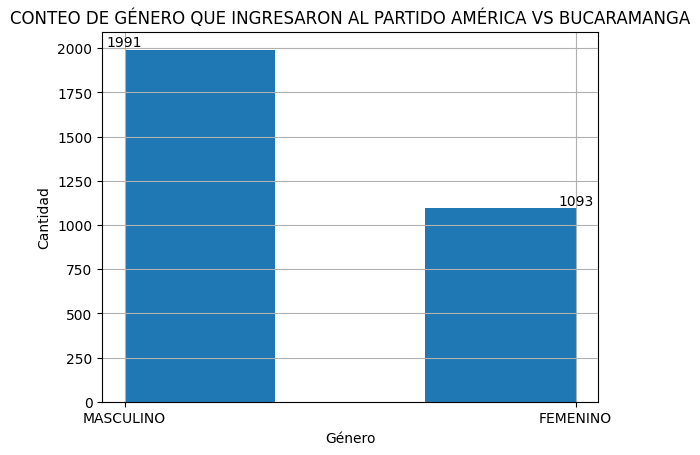

In [5]:

conteo_genero_barras(df)

In [6]:
def conteo_genero_torta(df):
    conteo_genero = df['GENERO'].value_counts()
    plt.pie(conteo_genero, labels=conteo_genero.index, autopct='%1.1f%%', startangle=140, colors=['#1ed660', '#a5eebf'],
            textprops={'color': "black", 'fontsize': 20})
    plt.title('Porcentaje de Hombres y Mujeres que ingresaron al partido América Vs Bucaramanga', color='#0d8337',
              fontsize=15)
    plt.show()

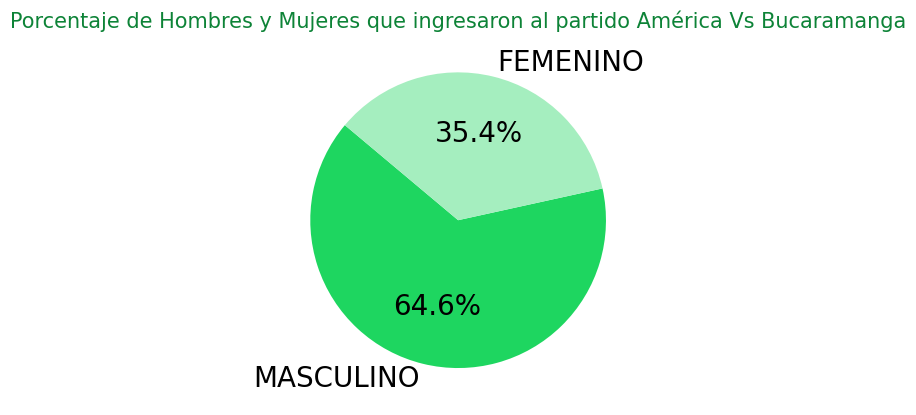

In [7]:
conteo_genero_torta(df)

In [8]:
def conteo_edades(df):
    bins = np.arange(0, 60, 4)  # Crea un arreglo que va de 0 a 60 con pasos de 4, para visualizar mejor las edades
    plt.hist(df['EDAD'], bins=bins, edgecolor='black')
    # Añadir títulos y etiquetas
    plt.title("Rango de Edades - Ingreso al Partido América vs Bucaramanga")
    plt.xlabel("Edad")
    plt.ylabel("Cantidad")
    plt.grid(True)
    # Calcular las posiciones para las etiquetas del eje x
    posiciones = [(a+b)/2 for a, b in zip(bins[:-1], bins[1:])]
    etiquetas = [f"{int(a)}-{int(b)-1}" for a, b in zip(bins[:-1], bins[1:])]
    # Ajustar las etiquetas del eje x
    plt.xticks(posiciones, etiquetas, rotation=90)  # 90 grados de los rótulos para mejor visualización
    # Mostrar el gráfico
    plt.show()


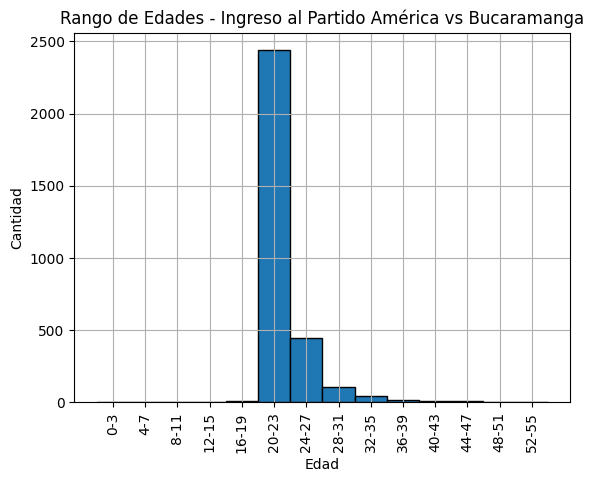

In [9]:
conteo_edades(df)

In [10]:
  def tipo_boletas_barras(df):
    df.groupby('TIPO BOLETA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
    # Ocultar los bordes superior y derecho
    plt.gca().spines[['top', 'right']].set_visible(False)
    # Mostrar los valores en la gráfica
    for index, value in enumerate(df.groupby('TIPO BOLETA').size()):
        plt.text(value, index, str(value))
    plt.show()

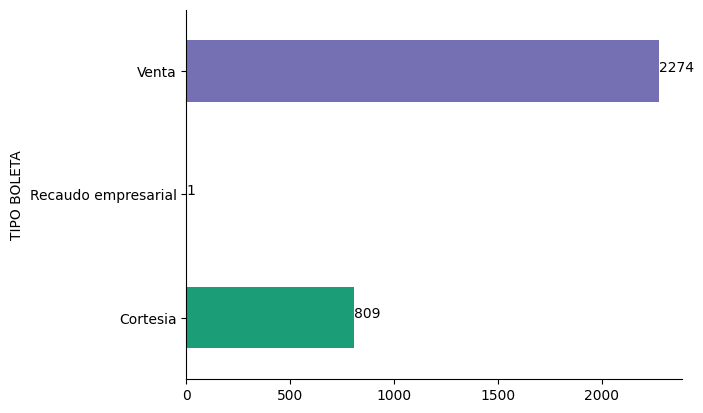

In [11]:
tipo_boletas_barras(df)

In [12]:
def tipo_boletas_torta(df):
  conteo_tipos = df['TIPO BOLETA'].value_counts()
  plt.pie(conteo_tipos, labels=conteo_tipos.index, autopct='%1.1f%%', startangle=140)
  plt.title('Distribución de Tipo de Boleta')
  plt.show()

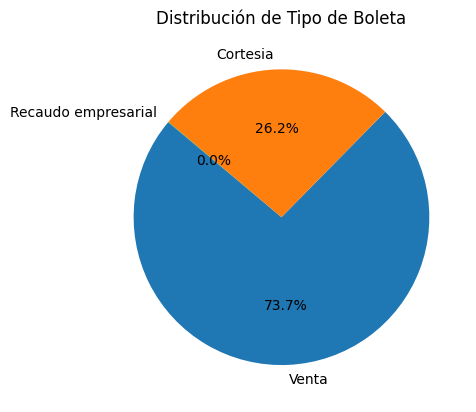

In [13]:
tipo_boletas_torta(df)

In [14]:
def ingreso_zonas(df):
  dfg = df.copy()
  dfg.groupby('NOMBRE DE ZONA').size().sort_values(ascending=True).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  # Ocultar los bordes superior y derecho
  plt.gca().spines[['top', 'right',]].set_visible(False)
  # Mostrar los valores en la gráfica
  for index, value in enumerate(dfg.groupby('NOMBRE DE ZONA').size().sort_values(ascending=True)):
      plt.text(value, index, str(value))
  plt.title('INGRESO DE PERSONAS A LAS TRIBUNAS DEL ESTADIO OLIMPICO PASCUAL GUERRERO')
  plt.show()

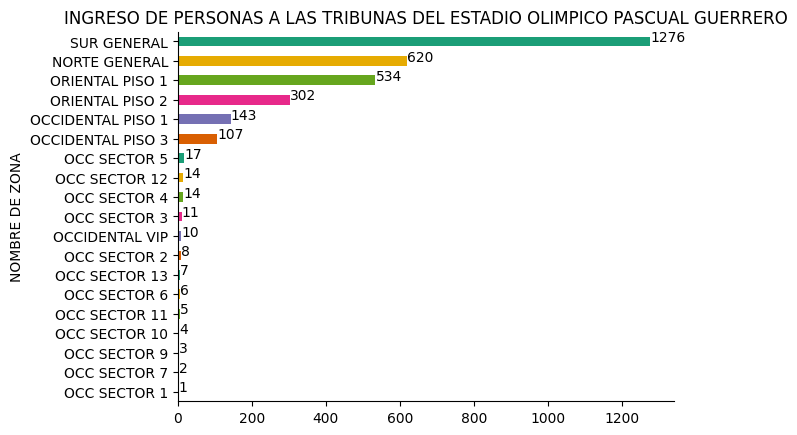

In [15]:
ingreso_zonas(df)

Transferir el dataframe de Pandas a una base de datos MySQL (Usando la conexión desde
Python).

In [19]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [20]:
import matplotlib.pyplot as plt
import mysql.connector

In [24]:
conn = mysql.connector.connect(user="root", password="78Illuminator*", host ="localhost")
cursor= conn.cursor()
query="SHOW DATABASES"
cursor.execute(query)

for x in cursor:
    print(x)

conn.close()

('dataframe',)
('gestion',)
('information_schema',)
('mysql',)
('performance_schema',)
('sys',)


In [25]:
conn = mysql.connector.connect(user="root", password="78Illuminator*", host ="localhost", database="dataframe")
cursor= conn.cursor()
query="SHOW TABLES"
cursor.execute(query)
for x in cursor:
    print(x)
conn.close()

('datos_limpios',)


In [42]:
def leer():
    conn = mysql.connector.connect(user="root", password="78Illuminator*", host ="localhost",database="dataframe")
    cursor= conn.cursor()
    query=f'SELECT * FROM datos_limpios ;'
    cursor.execute(query)
    datos = cursor.fetchall()
    conn.commit()
    conn.close()

    for x in datos:
        print(x)

In [34]:
leer()

('AMERICA VS BUCARAMANGA', '1007433104', 'GISEHT VALENCIA PInEROS', 'SUR GENERAL', 'Cortesia', 0.0, '8YY5G9UAUF', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '20/10/2000', 23, 'FEMENINO')
('AMERICA VS BUCARAMANGA', '1007440599', 'DANIEL  BALLESTEROS *', 'SUR GENERAL', 'Cortesia', 0.0, '6E99QCQXIA', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '9/04/2000', 23, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '1007441166', 'DEIBY ANDERSON PUNI  HURTADO', 'SUR GENERAL', 'Cortesia', 0.0, 'RI9EVIDAYR', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '4/12/2000', 23, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '1007447122', 'DIEGO FERNANDO FIGUEROA ARIAS', 'SUR GENERAL', 'Cortesia', 0.0, 'MVITGV4PE8', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '27/09/1999', 24, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '1007456509', 'GIAN CARLOS PULGARIN VASQUEZ', 'SUR GENERAL', 'Cortesia', 0.0, '73ZNQY58M8', datetime.date(2024, 2, 15), 'soporte@warena

In [40]:
conn = mysql.connector.connect(user="root", password="78Illuminator*", host ="localhost",database="dataframe")
cursor= conn.cursor()
query= f"INSERT INTO datos_limpios (`NOMBRE EVENTO`, `DOCUMENTO`, `NOMBRE PERSONA`, `NOMBRE DE ZONA`, `TIPO BOLETA`, `VALOR`, `PIN`, `FECHA INGRESO`, `CORREO`, `CELULAR`, `FECHA NACIMIENTO`, `EDAD`, `GENERO`) \
VALUES ('CALI VS REAL MADRID', '9452234', 'JAURES MERA', 'SUR GENERAL', 'Cortesia', 0, '23D3RS2AA9', '2024-02-15', 'anfesidocs@gmail.com', '3138709158', '1978-05-24', 45, 'MASCULINO');"
cursor.execute(query)
conn.commit()
conn.close()

In [43]:
leer()

('AMERICA VS BUCARAMANGA', '0', 'ANGELI GOMEZ RODRIGUEZ', 'OCC SECTOR 4', 'Cortesia', 0.0, 'Q27QZFUTVY', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '23/12/1986', 37, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '640434', 'OSCAR RUIZ ', 'OCCIDENTAL PISO 3', 'Venta', 77000.0, '6UDPTHHILL', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '18/09/1980', 43, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '10680593', 'DAYANA GUTAMA ', 'OCC SECTOR 3', 'Venta', 82000.0, 'E4H6KRYF78', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '1/10/1997', 26, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '11176', 'Tom eric Kunz Kunz', 'OCC SECTOR 11', 'Cortesia', 0.0, 'RSZTARIPPX', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '31/12/1995', 28, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '14524', 'Lion Glosch Glosch', 'OCC SECTOR 11', 'Cortesia', 0.0, 'UM5AO8YFHJ', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '2/09/1995', 28, 'MASCULINO')
('AME

In [47]:
conn = mysql.connector.connect(user="root", password="78Illuminator*", host ="localhost",database="dataframe")
cursor= conn.cursor()
query = f"UPDATE datos_limpios SET CORREO = 'CRUD@MYSQL.COM' WHERE `NOMBRE PERSONA` LIKE '%ANDRES%';"

cursor.execute(query)
conn.commit()
conn.close()

In [48]:
leer()

('AMERICA VS BUCARAMANGA', '0', 'ANGELI GOMEZ RODRIGUEZ', 'OCC SECTOR 4', 'Cortesia', 0.0, 'Q27QZFUTVY', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '23/12/1986', 37, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '640434', 'OSCAR RUIZ ', 'OCCIDENTAL PISO 3', 'Venta', 77000.0, '6UDPTHHILL', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '18/09/1980', 43, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '10680593', 'DAYANA GUTAMA ', 'OCC SECTOR 3', 'Venta', 82000.0, 'E4H6KRYF78', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '1/10/1997', 26, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '11176', 'Tom eric Kunz Kunz', 'OCC SECTOR 11', 'Cortesia', 0.0, 'RSZTARIPPX', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '31/12/1995', 28, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '14524', 'Lion Glosch Glosch', 'OCC SECTOR 11', 'Cortesia', 0.0, 'UM5AO8YFHJ', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '2/09/1995', 28, 'MASCULINO')
('AME

In [50]:
conn = mysql.connector.connect(user="root", password="78Illuminator*", host ="localhost",database="dataframe")
cursor= conn.cursor()
query = f"UPDATE datos_limpios SET VALOR = 1 WHERE `TIPO BOLETA` = 'Cortesia';"
cursor.execute(query)
conn.commit()
conn.close()

In [51]:
leer()

('AMERICA VS BUCARAMANGA', '0', 'ANGELI GOMEZ RODRIGUEZ', 'OCC SECTOR 4', 'Cortesia', 1.0, 'Q27QZFUTVY', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '23/12/1986', 37, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '640434', 'OSCAR RUIZ ', 'OCCIDENTAL PISO 3', 'Venta', 77000.0, '6UDPTHHILL', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '18/09/1980', 43, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '10680593', 'DAYANA GUTAMA ', 'OCC SECTOR 3', 'Venta', 82000.0, 'E4H6KRYF78', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '1/10/1997', 26, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '11176', 'Tom eric Kunz Kunz', 'OCC SECTOR 11', 'Cortesia', 1.0, 'RSZTARIPPX', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '31/12/1995', 28, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '14524', 'Lion Glosch Glosch', 'OCC SECTOR 11', 'Cortesia', 1.0, 'UM5AO8YFHJ', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '2/09/1995', 28, 'MASCULINO')
('AME

In [56]:
conn = mysql.connector.connect(user="root", password="78Illuminator*", host ="localhost",database="dataframe")
cursor= conn.cursor()
query= f"DELETE  FROM datos_limpios WHERE 'NOMBRE PERSONA' LIKE '%JAURES%';"
cursor.execute(query)
conn.commit()
print(cursor.rowcount, "registros borrados")
conn.close()

226 registros borrados


In [57]:
leer()

('AMERICA VS BUCARAMANGA', '0', 'ANGELI GOMEZ RODRIGUEZ', 'OCC SECTOR 4', 'Cortesia', 1.0, 'Q27QZFUTVY', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '23/12/1986', 37, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '640434', 'OSCAR RUIZ ', 'OCCIDENTAL PISO 3', 'Venta', 77000.0, '6UDPTHHILL', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '18/09/1980', 43, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '10680593', 'DAYANA GUTAMA ', 'OCC SECTOR 3', 'Venta', 82000.0, 'E4H6KRYF78', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '1/10/1997', 26, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '11176', 'Tom eric Kunz Kunz', 'OCC SECTOR 11', 'Cortesia', 1.0, 'RSZTARIPPX', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '31/12/1995', 28, 'MASCULINO')
('AMERICA VS BUCARAMANGA', '14524', 'Lion Glosch Glosch', 'OCC SECTOR 11', 'Cortesia', 1.0, 'UM5AO8YFHJ', datetime.date(2024, 2, 15), 'soporte@warena.co', '3015764331', '2/09/1995', 28, 'MASCULINO')
('AME

In [61]:
conn = mysql.connector.connect(user="root", password="78Illuminator*", host ="localhost",database="dataframe")
cursor= conn.cursor()
query= f"DELETE  FROM datos_limpios WHERE `NOMBRE PERSONA` LIKE '%JAURES%';"# SOLO ENCUENTRA CON ESTE CARACTER `
cursor.execute(query)
conn.commit()
print(cursor.rowcount, "registros borrados")
conn.close()

1 registros borrados


In [ ]:
def grafica_():
    conn = mysql.connector.connect(user="root", password="78Illuminator*", host="localhost", database="dataframe")
    cursor = conn.cursor()
    query = f'SELECT `NOMBRE DE ZONA`, COUNT(*) AS total_registros FROM datos_limpios GROUP BY `NOMBRE DE ZONA`;'
    cursor.execute(query)
    datos = cursor.fetchall()
    conn.commit()
    conn.close()

    zona = []
    cantidad = []

    for i in datos:
        zona.append(i[0])
        cantidad.append(i[1])

    plt.figure(figsize=(10, 10))
    plt.pie(cantidad, labels=zona, autopct='%1.1f%%', startangle=140)
    plt.title("Distribución de registros por zona")
    plt.tight_layout()
    plt.show()

grafica_()

In [94]:
def grafica_():
    conn = mysql.connector.connect(user="root", password="78Illuminator*", host="localhost", database="dataframe")
    cursor = conn.cursor()
    query = f'SELECT `NOMBRE DE ZONA`, COUNT(*) AS total_registros FROM datos_limpios GROUP BY `NOMBRE DE ZONA`;'
    cursor.execute(query)
    datos = cursor.fetchall()
    conn.commit()
    conn.close()

    zona = []
    cantidad = []

    for i in datos:
        zona.append(i[0])
        cantidad.append(i[1])
        
    # Crear la gráfica de barras
    plt.figure(figsize=(10, 6))
    plt.bar(zona, cantidad,color='limegreen')
    plt.ylim(0, 1300)
    plt.xlabel("TRIBUNA")
    plt.ylabel("CANTIDAD")
    plt.title("ZONAS DE INGRESO")
    plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas del eje x para mejor legibilidad
    plt.tight_layout()
    plt.show()



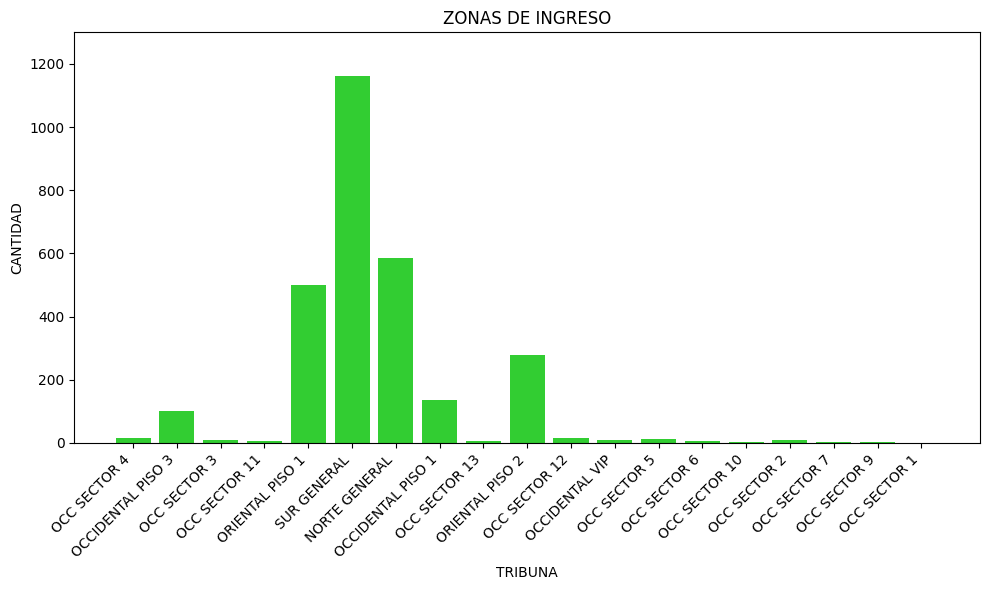

In [95]:
#leer()
grafica_()